# SOFS mooring

A notebook to calculate air-sea heat fluxes from the SOFS mooring

In [54]:
%load_ext autoreload
%autoreload 1

from AirSeaFluxCode import AirSeaFluxCode
import xarray as xr
import gsw_xarray as gsw
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import gsw_xarray as gsw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ds = xr.open_dataset("data/sofs_heat_data.nc")

In [91]:
ds

<xarray.Dataset>
Dimensions:            (TIME: 4162060, h_num: 15)
Coordinates:
  * TIME               (TIME) datetime64[ns] 2010-03-17T11:59:00.000003584 .....
    LATITUDE           (TIME) float32 -46.76 -46.76 -46.76 ... -47.0 -47.0 -47.0
    LONGITUDE          (TIME) float32 ...
    NOMINAL_DEPTH      float32 ...
Dimensions without coordinates: h_num
Data variables: (12/58)
    PL_CMP             (TIME) float32 ...
    WDIR               (TIME) float32 ...
    WSPD               (TIME) float32 ...
    WIND_H             (TIME) float32 ...
    WIND_FLAG          (TIME) int16 ...
    ATMP               (TIME) float32 ...
    ...                 ...
    RAIN_AMOUNT_SN     (TIME) int16 ...
    RELH_SN            (TIME) int16 ...
    SW_SN              (TIME) int16 ...
    TEMP_SN            (TIME) int16 ...
    WDIR_WSPD_H        (TIME) float32 ...
    WDIR_WSPD_SN       (TIME) int16 ...
Attributes: (12/58)
    project:                          Integrated Marine Observing System (IMOS)
    title:                            Heat and radiative flux data from South...
    institution:                      Australian Bureau of Meteorology
    date_created:                     2012-07-03T04:12:57Z
    abstract:                         SOFS is an observing platform in the Su...
    comment:                          COARE Bulk Flux Algorithm version 3.0b ...
    ...                               ...
    compliance_checks_passed:         cf imos:1.4
    compliance_checker_version:       2.3.1
    compliance_checker_imos_version:  1.1.3
    DODS.strlen:                      236
    DODS.dimName:                     h_string
    DODS_EXTRA.Unlimited_Dimension:   TIME

In [3]:
keys = [key for key in ds.keys()]

In [11]:
keys

['PL_CMP',
 'WDIR',
 'WSPD',
 'WIND_H',
 'WIND_FLAG',
 'ATMP',
 'ATMP_H',
 'ATMP_FLAG',
 'AIRT',
 'AIRT_H',
 'AIRT_FLAG',
 'RELH',
 'RELH_H',
 'RELH_FLAG',
 'TEMP',
 'TEMP_H',
 'TEMP_FLAG',
 'RAIN_AMOUNT',
 'RAIN_AMOUNT_H',
 'RAIN_AMOUNT_FLAG',
 'SW',
 'SW_H',
 'SW_FLAG',
 'LW',
 'LW_H',
 'LW_FLAG',
 'HS',
 'HL',
 'H_RAIN',
 'TAU',
 'SST',
 'HEAT_NET',
 'MASS_NET',
 'LW_NET',
 'SW_NET',
 'WSPD10M',
 'AIRT1_5M',
 'AIRT2_0M',
 'RELH1_5M',
 'RELH2_0M',
 'history',
 'AIRT_SN',
 'ATMP_SN',
 'COND',
 'COND_H',
 'COND_SN',
 'NOMINAL_LATITUDE',
 'NOMINAL_LONGITUDE',
 'LW_SN',
 'PSAL',
 'PSAL_H',
 'PSAL_SN',
 'RAIN_AMOUNT_SN',
 'RELH_SN',
 'SW_SN',
 'TEMP_SN',
 'WDIR_WSPD_H',
 'WDIR_WSPD_SN']

In [33]:
len(keys)

58

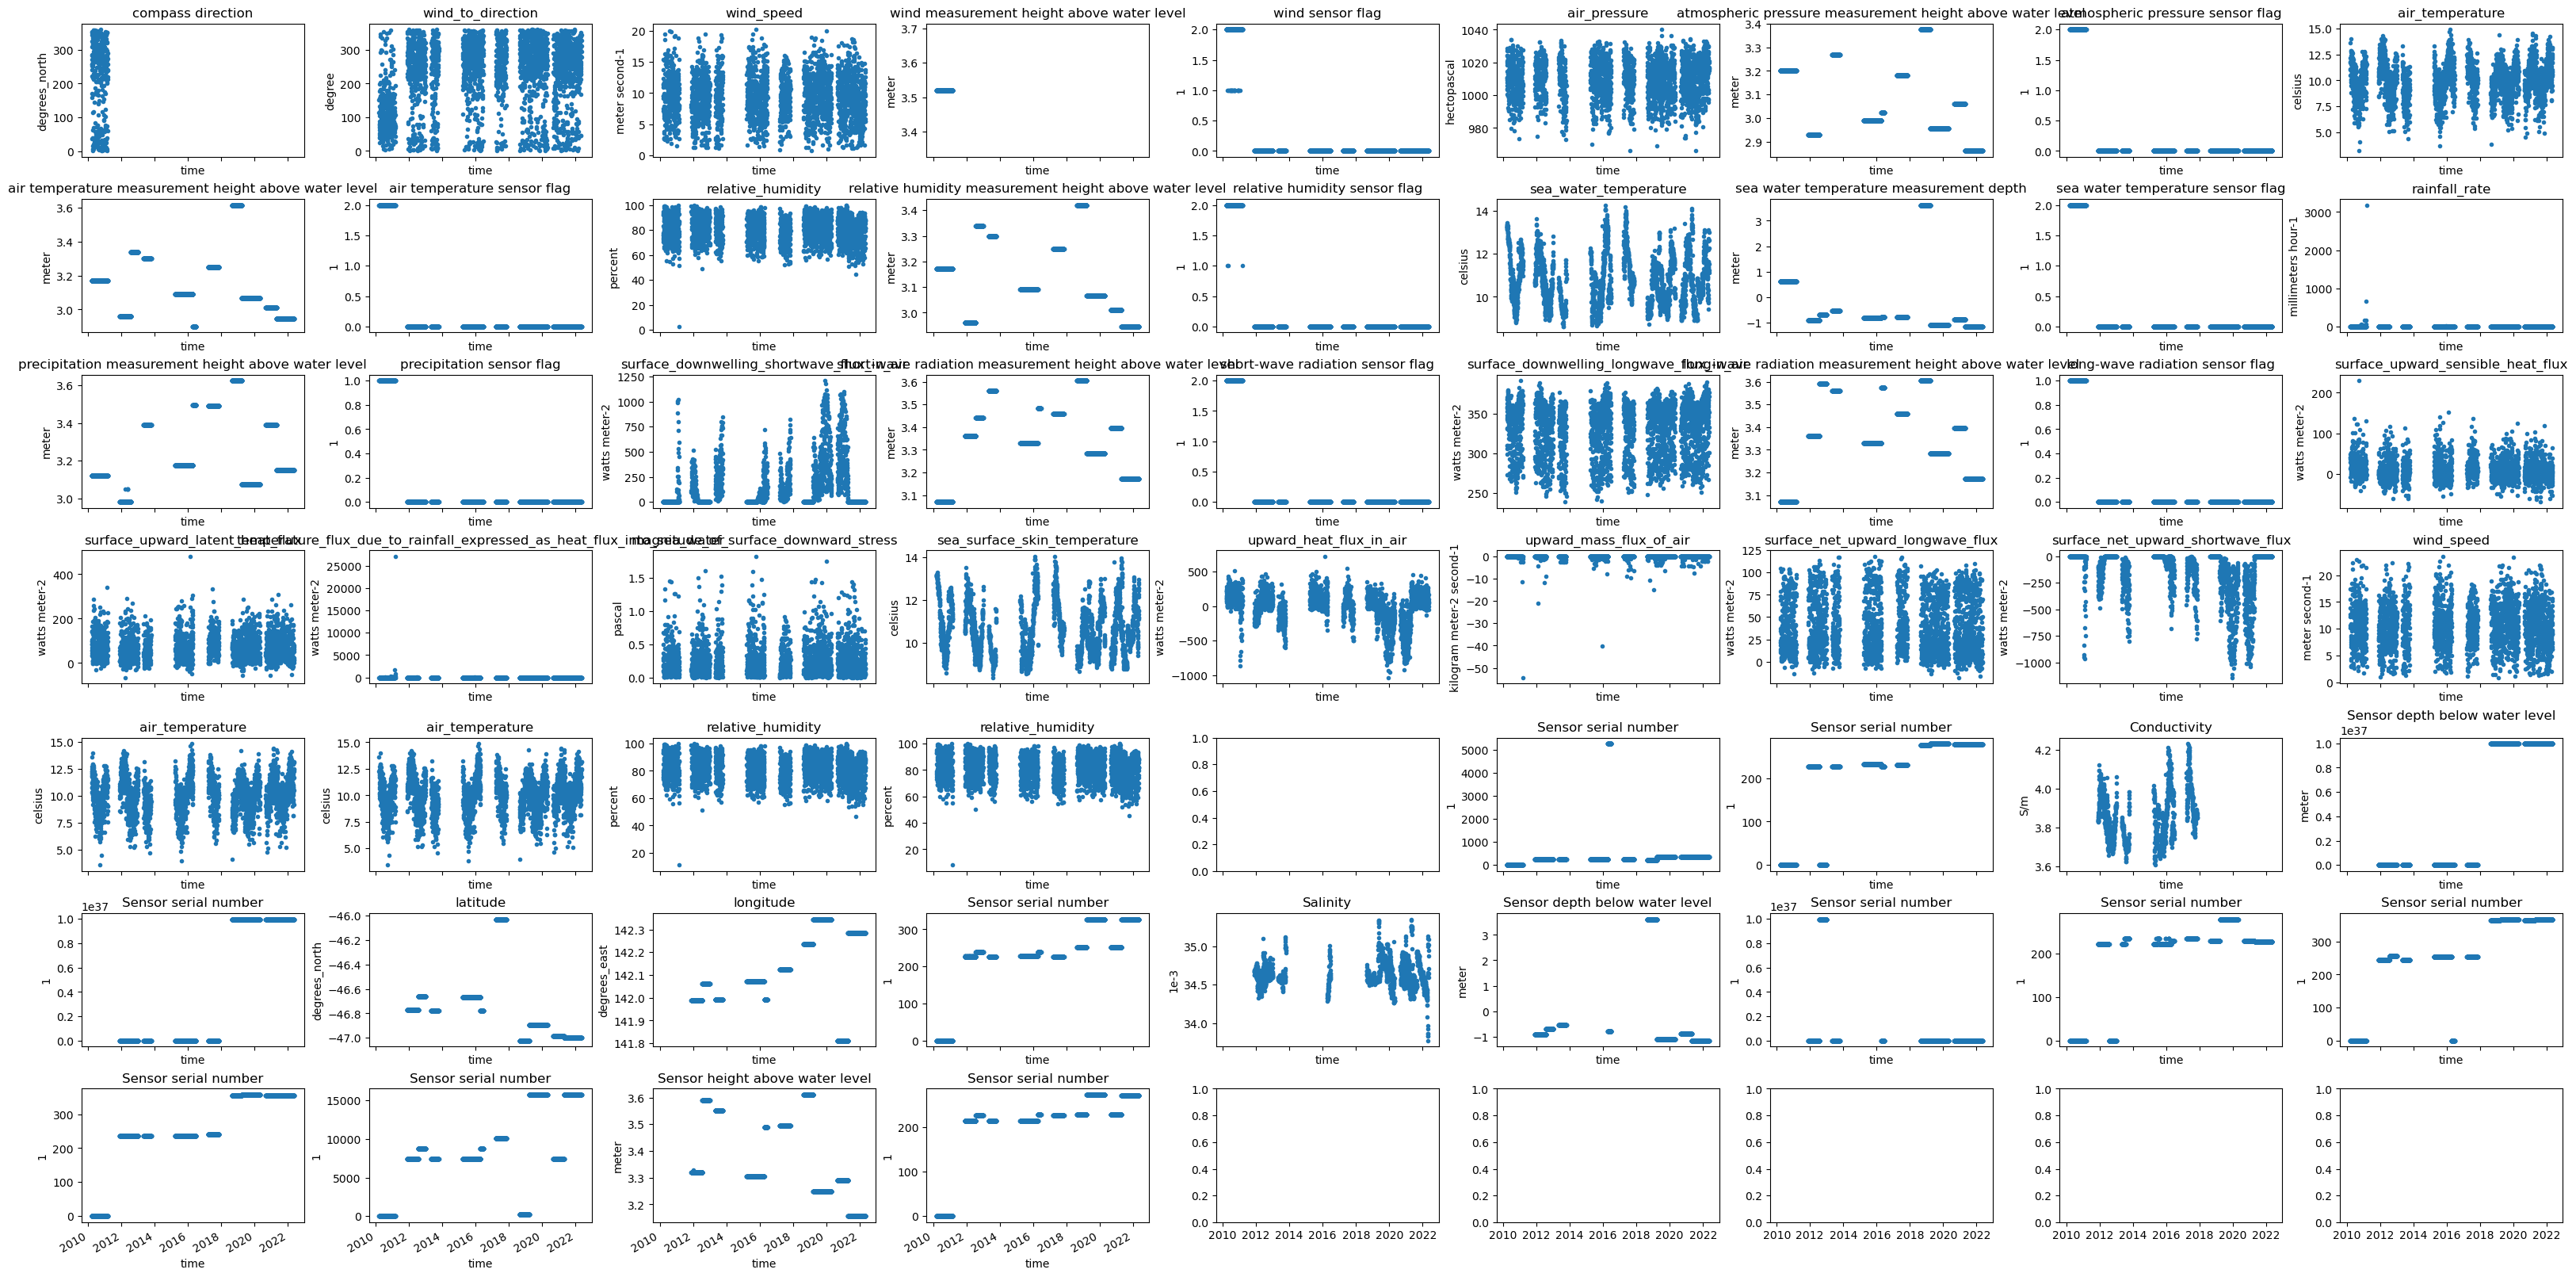

In [92]:
# Create a 7x9 grid of subplots with shared x-axis
fig, ax = plt.subplots(7, 9, sharex=True, constrained_layout=True, figsize=(32, 16))

# Flatten the axes array for easier iteration
ax = ax.flatten()

# Iterate over each subplot and corresponding variable
for axs, var in zip(ax, keys):
    # Skip plotting if the variable is "history"
    if var == "history":
        continue
    
    # Plot the variable, sampling every 1440th data point
    ds[var][::1440].plot(ax=axs, ls='', marker='.')
    
    # Set subplot title based on standard name or long name attribute of the variable
    title = ds[var].attrs["standard_name"] if "standard_name" in ds[var].attrs else ds[var].attrs["long_name"]
    axs.set(title=title, ylabel=ds[var].attrs["units"] if "units" in ds[var].attrs else "1")

In [93]:
# Interesting variables
variables = ["WSPD","ATMP","AIRT","RELH","TEMP","RAIN_AMOUNT","SW","LW","SST","PSAL","SW_NET","SW_NET"]

In [14]:
len(variables)

12

In [49]:
for var in variables:
    for attr_name, attr_value in ds[var].attrs.items():
        print(f"{attr_name}: {attr_value}")
    print()

standard_name: wind_speed
long_name: earth relative wind speed
units: meter second-1
observation_type: calculated
comment: Wind direction is calculated from observed wind vectors and compass and is relative to True North
ancillary_variables: WIND_FLAG

standard_name: air_pressure
long_name: atmospheric pressure
units: hectopascal
mslp_indicator: at sensor height
observation_type: measured
comment: After correction bias = .05 kPa, rms difference = 0.04 kPa, compared to WHOI ref.
ancillary_variables: ATMP_FLAG

standard_name: air_temperature
long_name: air temperature
units: celsius
observation_type: measured
ancillary_variables: AIRT_FLAG

standard_name: relative_humidity
long_name: relative humidity 
units: percent
observation_type: measured
ancillary_variables: RELH_FLAG

standard_name: sea_water_temperature
long_name: sea water temperature
units: celsius
observation_type: measured
comment: After correction bias = 2.6e-4 DegC, rms difference = 1.3e-4 DegC, compared to CSIRO ref.
ancil

## Plot the selected data

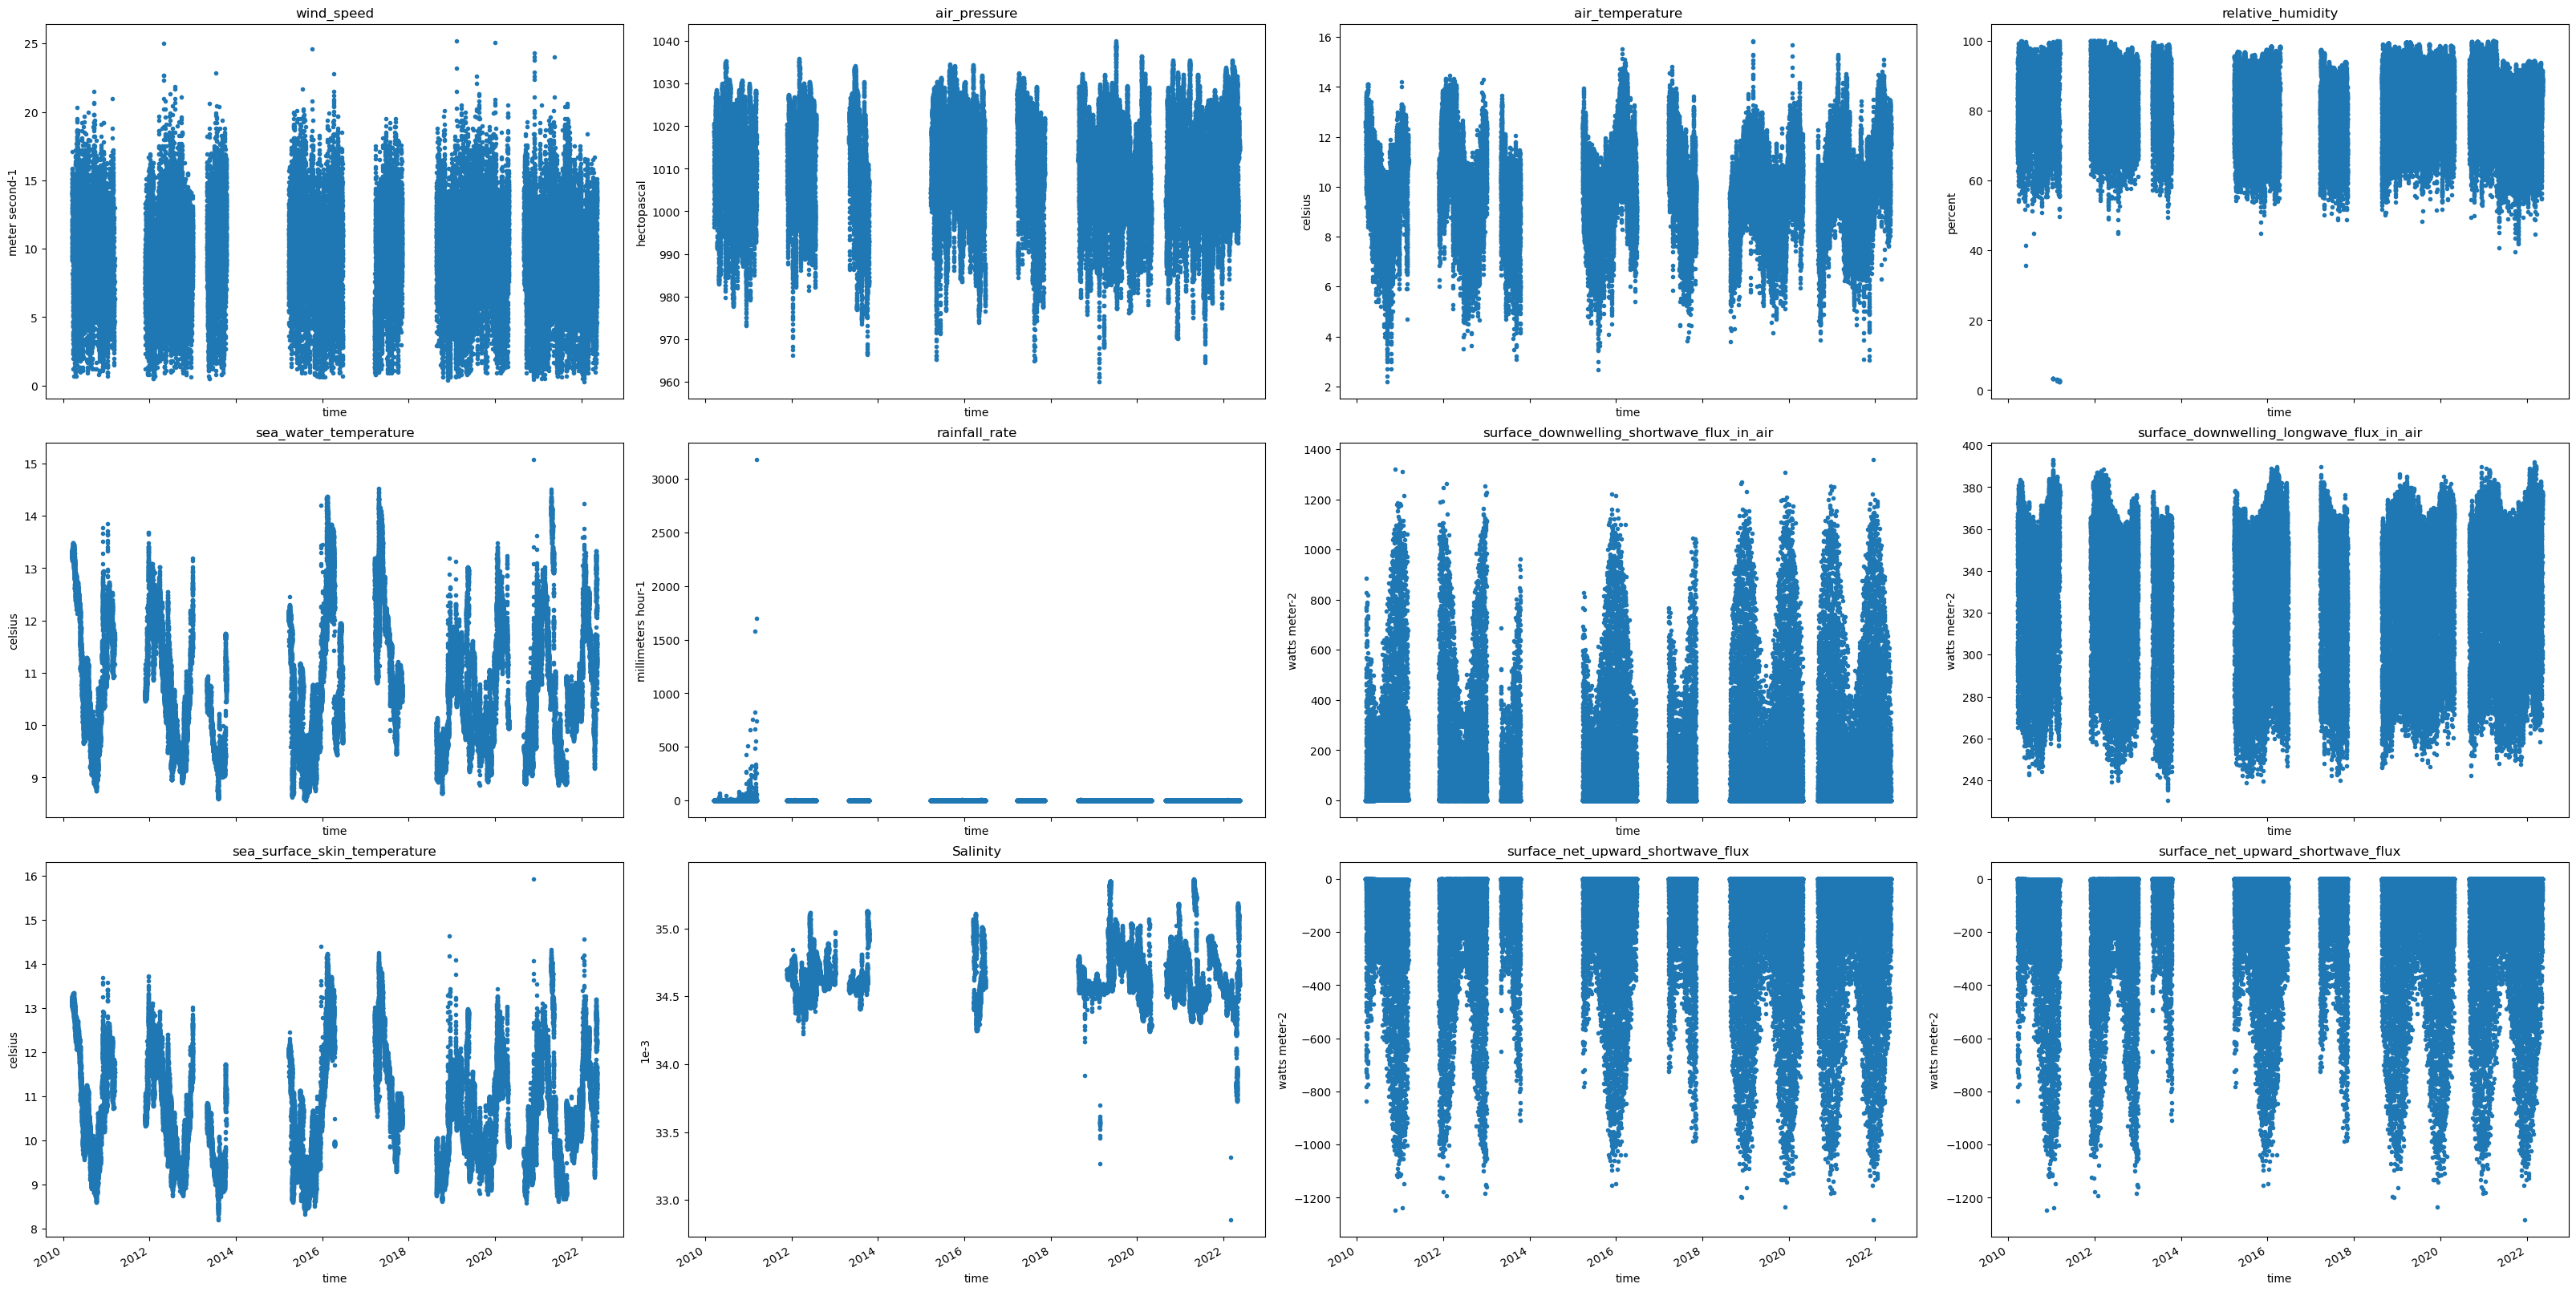

In [51]:
fig,ax = plt.subplots(3,4,sharex=True,constrained_layout=True,figsize=(32,16))

ax = ax.flatten()

for axs,var in zip(ax,variables):
      
    ds[var][::60].plot(ax=axs,ls='',marker='.')
    axs.set(title=ds[var].attrs["standard_name"] if "standard_name" in ds[var].attrs else ds[var].attrs["long_name"], ylabel=ds[var].attrs["units"])

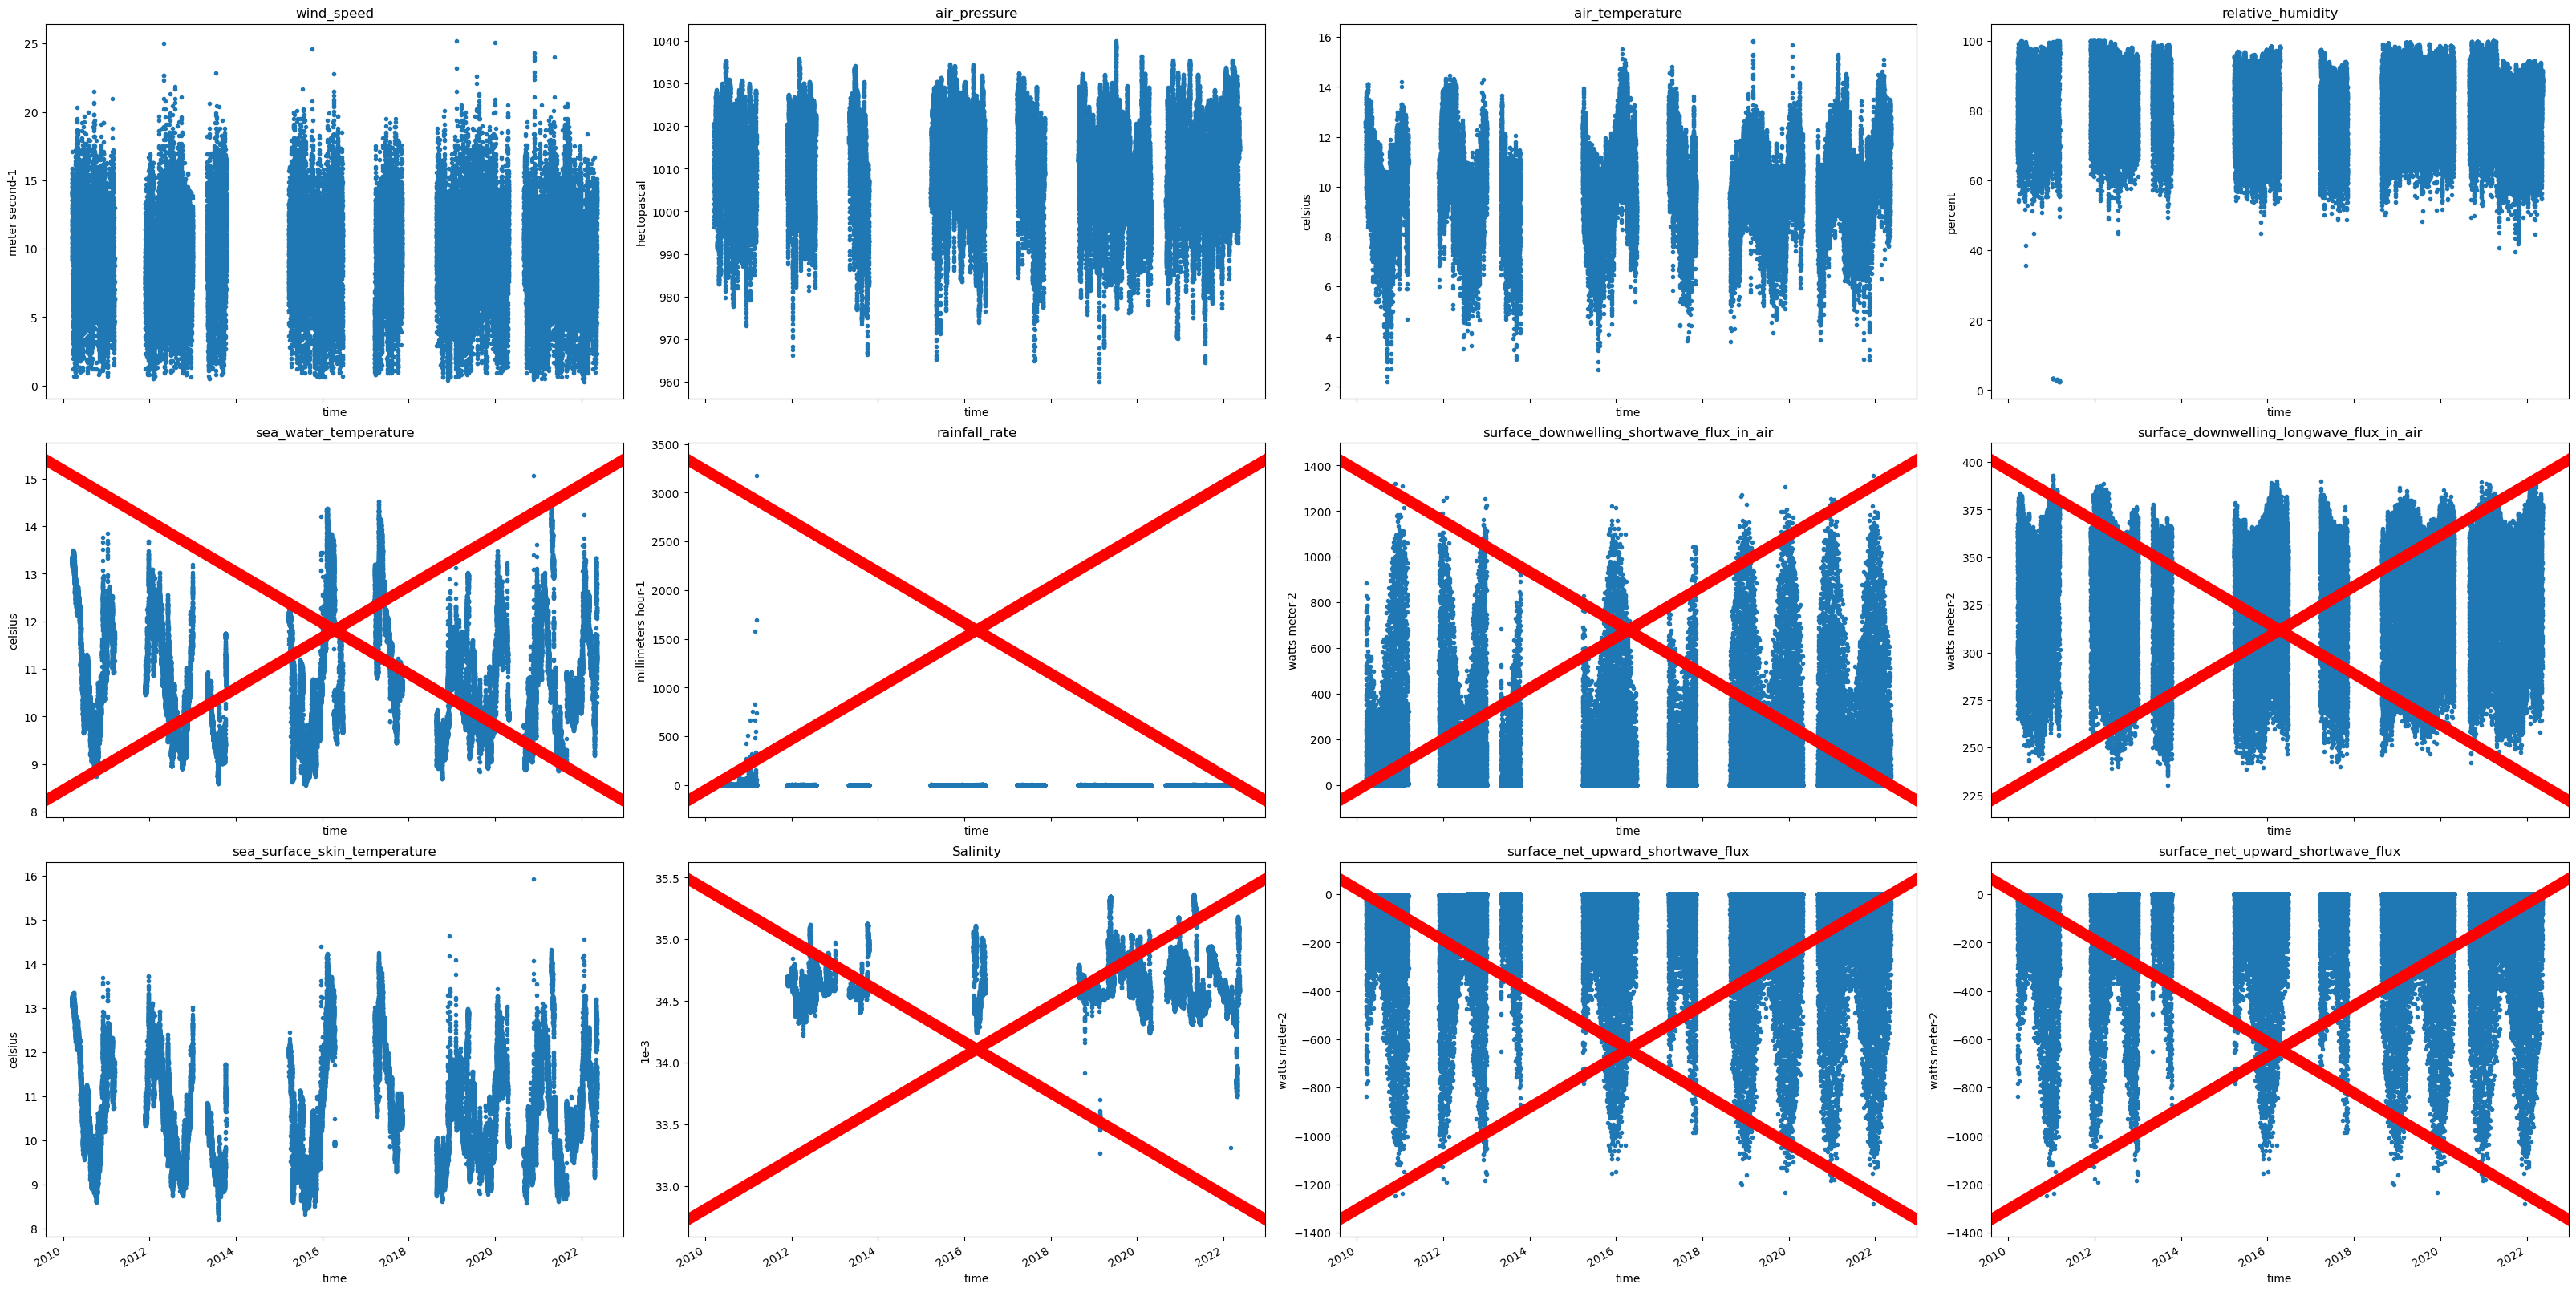

In [56]:
fig,ax = plt.subplots(3,4,sharex=True,constrained_layout=True,figsize=(32,16))

ax = ax.flatten()

for i,(axs,var) in enumerate(zip(ax,variables)):
      
    ds[var][::60].plot(ax=axs,ls='',marker='.')
    axs.set(title=ds[var].attrs["standard_name"] if "standard_name" in ds[var].attrs else ds[var].attrs["long_name"], ylabel=ds[var].attrs["units"])
    xmin, xmax = axs.get_xlim()
    axs.set_xlim(xmin, xmax)

    if i in [4,5,6,7,9,10,11]:
        # Get the limits of the plot
        ymin, ymax = axs.get_ylim()

        # Plot the red X
        axs.plot([xmin, xmax], [ymin, ymax], color='red', lw=10)
        axs.plot([xmin, xmax], [ymax, ymin], color='red', lw=10)
    
    axs.set_xlim(xmin, xmax)


In [4]:
variables = ["WSPD","ATMP","AIRT","RELH","SST"]

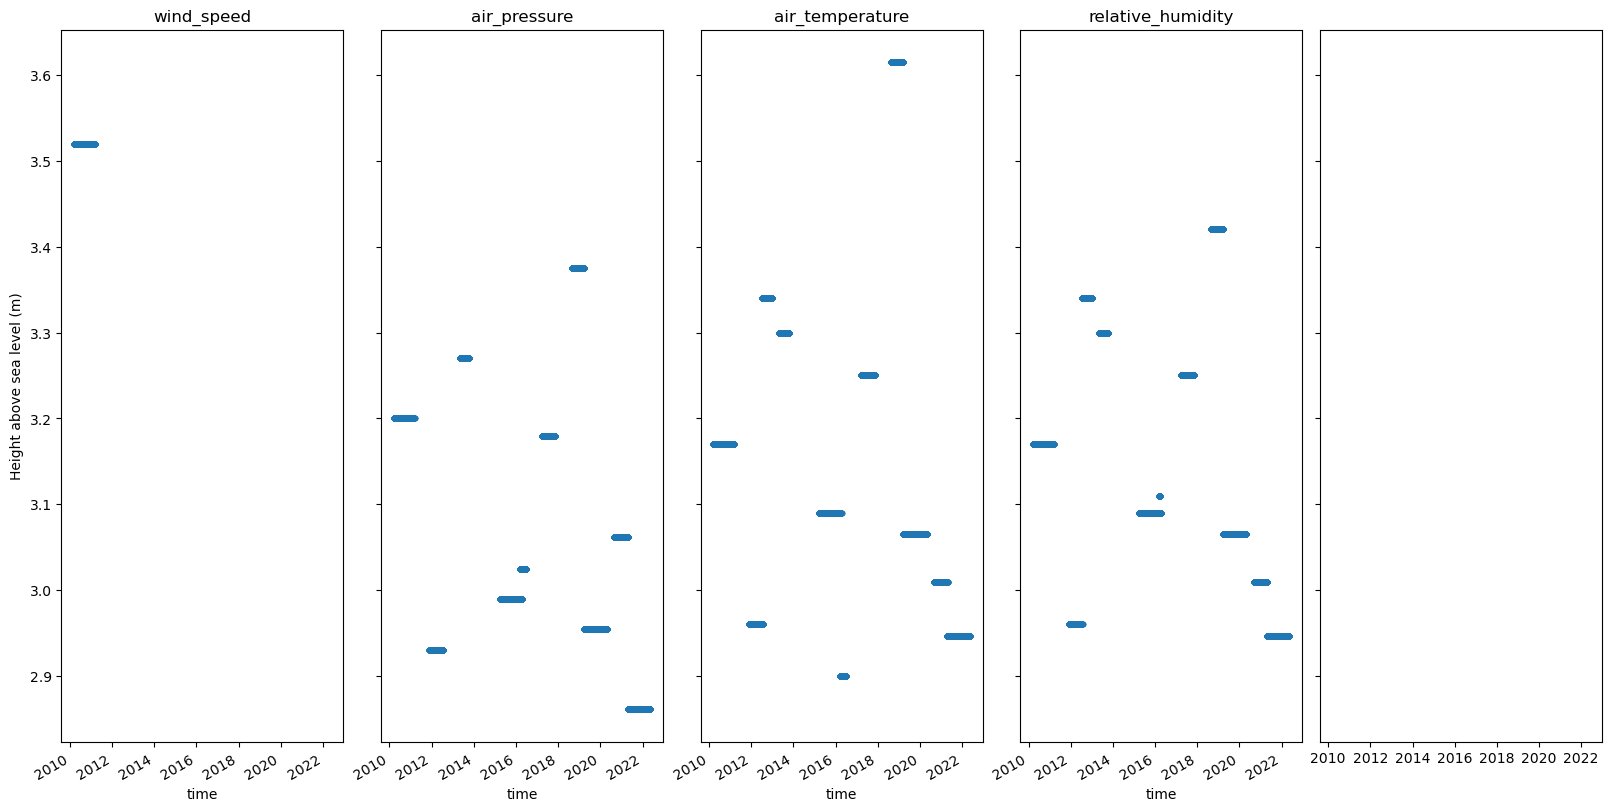

In [63]:
fig,ax = plt.subplots(1,5,sharex=True,constrained_layout=True,figsize=(16,8),sharey=True)

ax = ax.flatten()

for axs,var in zip(ax,variables[:-1]):
    
    ds[var+"_H" if var != "WSPD" else "WIND_H"][::60].plot(ax=axs,ls='',marker='.')
    axs.set(title=ds[var].attrs["standard_name"] if "standard_name" in ds[var].attrs else ds[var].attrs["long_name"], ylabel="Height above sea level (m)" if var == "WSPD" else "")

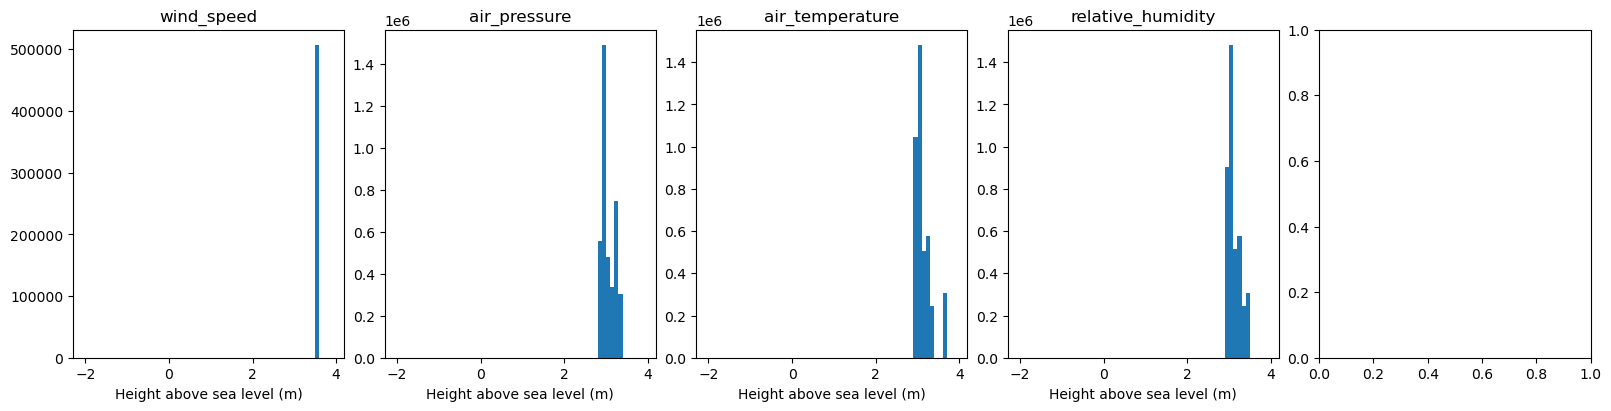

In [65]:
fig,ax = plt.subplots(1,5,sharex=False,constrained_layout=True,figsize=(16,4),sharey=False)

ax = ax.flatten()

for axs,var in zip(ax,variables[:-1]):
    
    ds[var+"_H" if var != "WSPD" else "WIND_H"].plot.hist(ax=axs,bins=np.arange(-2,4,0.1))
    axs.set(title=ds[var].attrs["standard_name"] if "standard_name" in ds[var].attrs else ds[var].attrs["long_name"], xlabel="Height above sea level (m)")

In [72]:
ds['WIND_H'].median().values

array(3.51999998)

In [73]:
ds['AIRT_H'].median().values

array(3.08999991)

In [74]:
ds['RELH_H'].median().values

array(3.08999991)

So, wind, air temp and rel. hum. is measured at 3.52, and 3.09 meters above sea level, respectively.

## Calculate TASF with ASFC

In [6]:
ds = ds.sortby("TIME")

In [7]:
ds_hourly = ds[variables].reset_coords().resample(TIME="1H").mean()
ds_daily = ds_hourly.resample(TIME="1D").mean()

In [20]:
lat  = np.asarray(ds_hourly["LATITUDE"])             # Latitude - As recorded by the mooring
spd  = np.asarray(ds_hourly["WSPD"])                 # Wind speed - As measured by the mooring
t    = np.asarray(ds_hourly["AIRT"])                 # Air temperature - As measured by the mooring
rhum = np.asarray(ds_hourly["RELH"])                 # Air temperature - As measured by the mooring
sst  = np.asarray(ds_hourly["SST"])                  # Sea surface temperature - As measured by the mooring

idx = np.logical_or(np.logical_or(np.isnan(spd),
                                  np.isnan(t)),
                    np.logical_or(np.isnan(rhum),
                                  np.isnan(sst)))

ds_hourly = ds_hourly.isel(TIME=idx)

In [82]:
# Initialize a constant
hin  = [3.52,3.09,3.09]  # Height of the sensors

# Calculate temperature at 2 meters above the sea surface, as the input ´hout´ is = 2, despite the ´out_var´ being = 't10n'
fluxes = ASFC(spd[idx], 
              t[idx], 
              sst[idx], 
                "skin", 
              meth = "C35", 
              lat = lat[idx], 
              hin = hin, 
              hout = 10,
              hum=["rh", rhum[idx]], 
              out_var = ['latent','sensible'])


# Assign some flags or indicators to the 'flags' column
ds_hourly['sensible'] = (list(ds_hourly.dims)[0]), fluxes['sensible']
ds_hourly['latent'] = (list(ds_hourly.dims)[0]), fluxes['latent']
ds_hourly['tasf'] = (list(ds_hourly.dims)[0]), fluxes['latent'] + fluxes['sensible']

In [84]:
ds_hourly = ds_hourly.rename({'TIME':"time",
                              "WSPD":"wind_speed",
                              "ATMP":"pressure",
                              "AIRT":"air_temp",
                              "RELH":"rel_hum",
                              "SST":"sst",
                              "LATITUDE":"latitude"})

## Test full

In [94]:
lat  = np.asarray(ds["LATITUDE"])             # Latitude - As recorded by the mooring
spd  = np.asarray(ds["WSPD"])                 # Wind speed - As measured by the mooring
t    = np.asarray(ds["AIRT"])                 # Air temperature - As measured by the mooring
rhum = np.asarray(ds["RELH"])                 # Air temperature - As measured by the mooring
sst  = np.asarray(ds["SST"])                  # Sea surface temperature - As measured by the mooring

# Initialize a constant
hin  = [3.52,3.09,3.09]  # Height of the sensors

# Calculate temperature at 2 meters above the sea surface, as the input ´hout´ is = 2, despite the ´out_var´ being = 't10n'
fluxes = ASFC(spd, 
              t, 
              sst, 
                "skin", 
              meth = "C35", 
              lat = lat, 
              hin = hin, 
              hout = 10,
              hum=["rh", rhum], 
              out_var = ['latent','sensible'])

# Assign some flags or indicators to the 'flags' column
ds['sensible'] = (list(ds.dims)[0]), fluxes['sensible']
ds['latent'] = (list(ds.dims)[0]), fluxes['latent']
ds['tasf'] = (list(ds.dims)[0]), fluxes['latent'] + fluxes['sensible']

In [99]:
ds["tasf"] = ds["tasf"].where(ds["tasf"] > -10000) # A weird anomaly

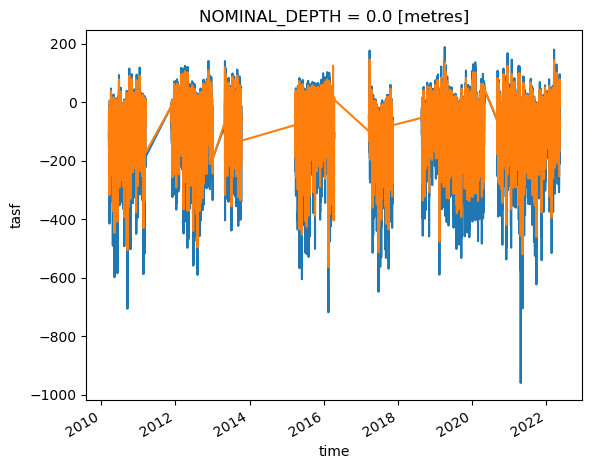

In [100]:
ds["tasf"].plot()
ds_hourly["tasf"].plot()

## Wind speed play

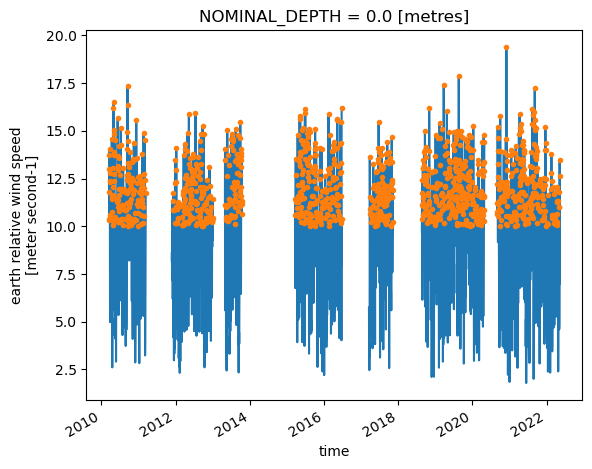

In [39]:
ds_daily["WSPD"].plot()
ds_daily["WSPD"].where(ds_daily["WSPD"]>10).plot(ls='',marker='.')

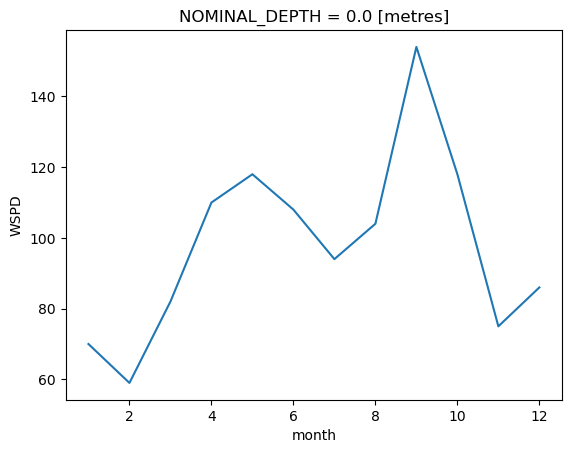

In [47]:
(ds_daily["WSPD"]>10).resample(TIME='1M').sum().groupby("TIME.month").sum().plot()

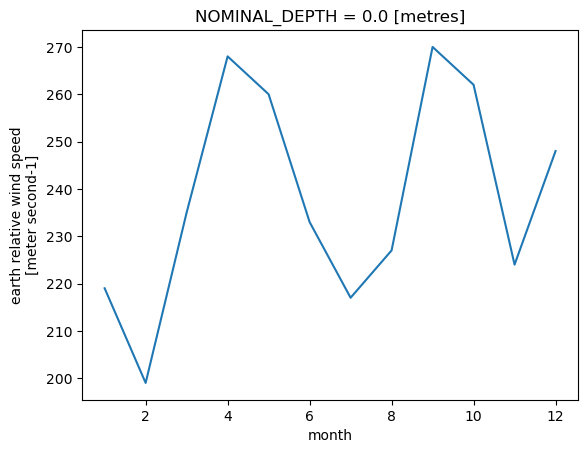

In [48]:
(np.isfinite(ds_daily["WSPD"])).resample(TIME='1M').sum().groupby("TIME.month").sum().plot()

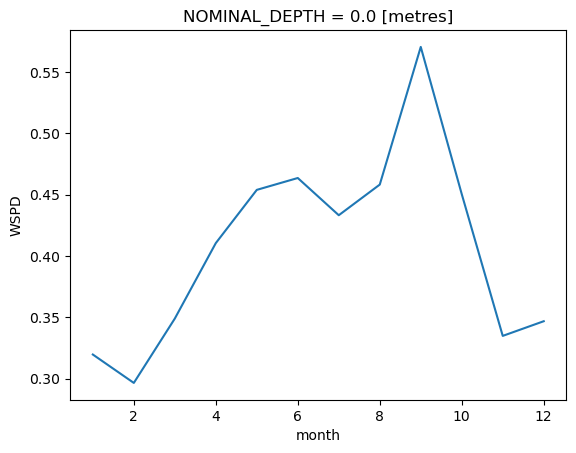

In [49]:
((ds_daily["WSPD"]>10).resample(TIME='1M').sum().groupby("TIME.month").sum()/(np.isfinite(ds_daily["WSPD"])).resample(TIME='1M').sum().groupby("TIME.month").sum()).plot()